<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introdução-ao-Cenário" data-toc-modified-id="Introdução-ao-Cenário-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introdução ao Cenário</a></span><ul class="toc-item"><li><span><a href="#Pool-de-Ideias" data-toc-modified-id="Pool-de-Ideias-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pool de Ideias</a></span></li><li><span><a href="#Bibliotecas-Utilizadas" data-toc-modified-id="Bibliotecas-Utilizadas-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bibliotecas Utilizadas</a></span></li><li><span><a href="#Variáveis-do-Projeto" data-toc-modified-id="Variáveis-do-Projeto-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Variáveis do Projeto</a></span></li></ul></li><li><span><a href="#Leitura-dos-Sinais" data-toc-modified-id="Leitura-dos-Sinais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leitura dos Sinais</a></span><ul class="toc-item"><li><span><a href="#Taxa-de-Amostragem" data-toc-modified-id="Taxa-de-Amostragem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Taxa de Amostragem</a></span></li><li><span><a href="#Analisando-os-Sinais" data-toc-modified-id="Analisando-os-Sinais-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analisando os Sinais</a></span></li><li><span><a href="#Duração-dos-Sinais" data-toc-modified-id="Duração-dos-Sinais-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duração dos Sinais</a></span></li><li><span><a href="#Visualizando-os-Sinais" data-toc-modified-id="Visualizando-os-Sinais-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizando os Sinais</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Domínio-do-Tempo" data-toc-modified-id="Domínio-do-Tempo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Domínio do Tempo</a></span><ul class="toc-item"><li><span><a href="#Envelope-de-Amplitude" data-toc-modified-id="Envelope-de-Amplitude-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Envelope de Amplitude</a></span></li><li><span><a href="#Root-Mean-Squared-Energy" data-toc-modified-id="Root-Mean-Squared-Energy-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Root Mean Squared Energy</a></span></li><li><span><a href="#Zero-Crossing-Rate" data-toc-modified-id="Zero-Crossing-Rate-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Zero Crossing Rate</a></span></li></ul></li><li><span><a href="#Domínio-da-Frequência" data-toc-modified-id="Domínio-da-Frequência-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Domínio da Frequência</a></span><ul class="toc-item"><li><span><a href="#Transformada-de-Fourier" data-toc-modified-id="Transformada-de-Fourier-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Transformada de Fourier</a></span></li><li><span><a href="#Espectrogramas" data-toc-modified-id="Espectrogramas-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Espectrogramas</a></span></li><li><span><a href="#Mel-Espectrogramas" data-toc-modified-id="Mel-Espectrogramas-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Mel Espectrogramas</a></span></li></ul></li></ul></li></ul></div>

Este notebook tem por objetivo propor uma visão clara sobre sinais de áudio e suas características, dentro do contexto relacionado ao projeto **Voice Unlocker** que, por sua vez, refere-se a construção de uma inteligência capaz de reconhecer interlocutores e acionar dispositivos eletrônicos a partir da voz. O desenvolvimento do código e das análises teóricas a seguir faz parte do trabalho de graduação do curso de Engenharia de Informação, oferecido pela Universidade Federal do ABC.

<img src="https://i.imgur.com/Mlc4aW6.png" alt="voice-unlocker logo">

Em uma visão geral, o projeto **Voice Unlocker** pretende aplicar o conceito de _speaker verification_ ou _speaker detection_ para utilizar a voz de interlocutores em sua identificação. Dessa forma, é imprescindívei que se tenha conhecimentos relevantes a respeito de sinais de áudio, desde a sua formação até formas de extrair _features_ para caracterízação dos sinais. Para isso, será utilizado o Python como linguagem principal de programação, além de bibliotecas construídas com ricas abordagens e funcionalidades nesse meio como, por exemplo, a biblioteca `librosa`. Eventualmente, serão utilizados modelos de Machine Learning propostos pela biblioteca `sklearn` para o treinamento de modelos de classificação supervisionada. Em outra vertente ainda a ser estudada, também será possível utilizar frameworks de Deep Learning, como `keras` e `TensorFlow`, para treinar Redes Neurais capazes de realizar todo o processo de extração de features de forma automática de modo a reconhecer interlocutores.

# Introdução ao Cenário

Para a realização do processo de extração de features, foram coletados três sinais de áudio de três interlocutores distintos. À todos, foi solicitado a pronunícia da frase: "Abra a porta". De acordo com suas características vocais, os interlocutores pronunciaram a frase e gravaram o conteúdo para utilização posterior.

> 📌**Nota**: os sinais de áudio a serem lidos neste documento fazem parte de um teste inicial onde três diferentes interlocutores pronunciaram uma mesma frase específica para futuras análises comparativas. Assim, as amostras são compostas por:
* **_Interlocutor 01_**: áudio de 2 segundos e com 5,5kB
* **_Interlocutor 02_**: áudio de 1 segundo e com 3,5kB
* **_Interlocutor 03_**: áudio de 3 segundos e com 6,7kB

<div class="alert alert-block alert-info">
<b>Observação:</b> As amostras de áudio utilizadas neste notebook foram gravadas via WhatsApp através de um equipamento celular <code>moto g(6) plus</code> com Android versão 9 (PPW29.116-16-29). As gravações foram realizadas e enviadas a um contato específico na plataforma para posteriormente serem baixadas em formato .ogg no sistema operacional de trabalho.
</div>

## Pool de Ideias

___
`[IDEIA 01]` para desenvolvimento de rotina (script) no whatsapp para realizar o download rotineiro de arquivos de um determinado grupo. Dessa forma, seria possível:
1. Criar um grupo no whatsapp específico para cada interlocutor;
2. Combinar com os interlocutores que enviem mensagens de áudio rotineiramente para grupos individuais
3. Rodar (ou deixar rodando) script que realiza o download destes sinais

`[IDEIA 02]` criar uma função pra ler sinais de áudio e transformar os dados em um pandas DataFrame. A ideia é gerar uma base de dados com as principais informações do áudio em formato tabular.

`[IDEIA 03]` testar simulações em vida real, analisando erros de reconhecimento com outras pessoas pronunciando frases ou mesmo possíveis erros em pessoas não habilitadas utilizando gravações de pessoas habilitadas pra tentar burlar o sistema.
___

## Bibliotecas Utilizadas

In [1]:
# Importando bibliotecas
import librosa
import librosa.display as ld
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from warnings import filterwarnings
import os
import numpy as np
import scipy as sp

filterwarnings('ignore')
%matplotlib inline

## Variáveis do Projeto

In [21]:
# Definindo variáveis a serem utilizadas
DATA_PATH = '../data/samples'
A1_FILE = 'interlocutor01.ogg'
A2_FILE = 'interlocutor02.ogg'
A3_FILE = 'interlocutor03.ogg'

A1_PATH = os.path.join(DATA_PATH, A1_FILE)
A2_PATH = os.path.join(DATA_PATH, A2_FILE)
A3_PATH = os.path.join(DATA_PATH, A3_FILE)

SAMPLE_RATE = 22050
FRAME_SIZE = 1024
STFT_FRAME_SIZE = 2048
HOP_LENGTH = 512
N_MELS = 90

COLORS = ['navy', 'seagreen', 'salmon']

# Leitura dos Sinais

Uma vez abordado todo o contexto do projeto e da geração dos sinais de áudio a serem utilizados na exploração, é possível agora utilizar a biblioteca `librosa` para ler e explorar o conteúdo dos arquivos armazenados.

In [3]:
# Verificando arquivos no diretório de áudios
print(f'Arquivos presentes no diretório de áudio: \n\n{os.listdir(DATA_PATH)}')

Arquivos presentes no diretório de áudio: 

['interlocutor03.ogg', 'interlocutor02.ogg', 'interlocutor01.ogg']


In [4]:
# Realizando a leitura dos sinais
y1, _ = librosa.load(A1_PATH)
y2, _ = librosa.load(A2_PATH)
y3, _ = librosa.load(A3_PATH)

# Analisando as dimensões retornadas
print(f'Dimensão do sinal y1: {y1.shape}')
print(f'Dimensão do sinal y2: {y2.shape}')
print(f'Dimensão do sinal y3: {y3.shape}')

Dimensão do sinal y1: (56889,)
Dimensão do sinal y2: (32634,)
Dimensão do sinal y3: (74088,)


A função [`load`](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html) da biblioteca `librosa` realiza a leitura de um sinal de onda e retorna dois parâmetros: um sinal `y` com as amplitudes características e o elemento `sr` representando o _sampling rate_ ou taxa de amostragem do sinal.

A sessão abaixo foi criada para propor um melhor entendimento sobre os elementos de retorno da função de leitura aplicada acima.

## Taxa de Amostragem

Até o momento atual, os sinais de áudio são entendidos como formas de onda geradas a partir do distúrbio de pressão das moléculas de ar geradas pela fala. Caracterizados como ondas mecânicas no meio analógico, tais sinais, ao serem tratados e analisados computacionalmente, necessitam de uma conversão analógico-digital. Somente assim, os elementos contínuos de amplitude e tempo são transformados em blocos discretos que podem ser analisados de modo a extrair características importantes para processos computacionais.

A *amostragem* é um procedimento capaz de coletar informações pontuais de _amostras_ de um sinal de áudio analógico e contínuo, gerando assim um sinal digital e discreto. Para sua efetividade, é preciso definir um parâmetro relacionado a frequência com que esses sinais pontuais são coletados: neste momento surge a _taxa de amostragem_ ou _sampling rate_.

Na prática, a taxa de amostragem não pode ser escolhida de forma arbitrária, uma vez que deve representar uma transcrição fiel do sinal original de modo a evitar grandes perdas de informações durante o processo de conversão. Para definir, de fato, o melhor valor para essa taxa, é preciso considerar um conceito extremamente importante relacionado a _frequência de Nyquist_:


> 📌 **Torema de Nyquist-Shannon**: _"Seja um sinal, limitado em banda, e seu intervalo de tempo dividido em partes iguais, de forma que se obtenham intervalos tais que, cada subdivisão compreenda um intervalo com período $T$ segundos, onde $T$ é menor do que $f_m/2$, e se uma amostra instantânea é tomada arbitrariamente de cada subintervalo, então o conhecimento da amplitude instantânea de cada amostra somado ao conhecimento dos instantes em que é tomada a amostra de cada subintervalo contém toda a informação do sinal original."_


Sabe-se que o range de escuta do ser humano varia entre 20 a aproximadamente 20.000Hz e, portanto, elementos sonoros fora desse intervalo podem ser considerados imperceptíveis ao ouvido humano. Para que seja escolhida uma taxa de amostragem sem que haja perdas de sinais perceptíveis, é possível levar em consideração o teorema de Nyquist para definir esse parâmetro. 

Em diversas aplicações, são encontradas taxas de amostragens de 44100Hz ou 22050Hz, sendo o primeiro caso muito popular em análises musicais sem nenhuma perda de frequência perceptível, visto que $f_N = \frac{s_r}{2} = 22050$ supera o limiar humano. Em estudos relacionados a reconhecimento de voz, taxas de amostragem de 22050Hz são popularmente usadas por reservar espaço sem perdas significantes.

Links de referência:

https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon

https://manual.audacityteam.org/man/sample_rates.html

## Analisando os Sinais

Uma vez entendido o conceito por trás da _amostragem_ de um sinal analógico para que uma análise digital possa ser feita, é possível utilizar o _widget_ importado do módulo `IPython.display` para literalmente escutar os sinais de áudio lidos.

In [5]:
# Áudio 01
ipd.Audio(A1_PATH)

In [6]:
# Áudio 02
ipd.Audio(A2_PATH)

In [7]:
# Áudio 03
ipd.Audio(A3_PATH)

Sobre os interlocutores, é possível pontuar as seguintes informações prévias:
* **_Interlocutor 1_**: gênero masculino entre 25 e 30 anos;
* **_Interlocutor 2_**: gênero masculino entre 60 e 65 anos;
* **_Interlocutor 3_**: gênero feminino entre 55 e 60 anos.

As características de gênero e idade do interlocutor trazem uma ideia interessante a respeito da identificação dos mesmos. É possível analisar, com essas informações prévias, os sinais sobre uma outra ótica, associando os elementos perceptíveis e comparando os cenários opostos de gênero e idade. Entretanto, computacionalmente falando, a construção de uma inteligência capaz de reconhecer interlocutores vai muito além da extração de gênero e idade de um sinal de entrada. Além disso, na prática, tais informações são intrínsecas ao próprio interlocutor e, em muitos casos, não são acessíveis ou informadas previamente.

No decorrer desse notebook, serão pontuadas algumas _features_ a serem extraídas de sinais de áudio com o objetivo de caracterizar e propor uma diferenciação clara dos mesmos.

## Duração dos Sinais

Realizando uma experiência intuitiva, é proposto o cálculo de duração de cada um dos sinais lidos a partir da quantidade de amostras e a taxa de amostragem. Ao realizar a leitura dos sinais, foram analisads as dimensões de cada um deles, sendo este um parâmetro que representa, na prática, a quantidade de amostras (amplitudes, no domínio do tempo) em cada áudio. Possuindo o total de amostras e a taxa de amostragem (amostras por segundo), é possível calcular a duração total de cada um deles com:

$$d_r = \frac{\text{len(signal)}}{s_r}$$

Onde `len(signal)` representa o total de amostras do sinal e $s_r$ representa a taxa de amostragem. A fração $\frac{1}{s_r}$ indica a duração, em segundos, de uma única amostra do sinal lido com a referida taxa de amostragem. Ao multiplicar esse fator pelo total de amostras, tem-se então a duração total do sinal.

In [8]:
# Calculando a duração dos sinais
d1 = len(y1) / SAMPLE_RATE
d2 = len(y2) / SAMPLE_RATE
d3 = len(y3) / SAMPLE_RATE

print(f'Duração do sinal y1: {d1} segundos')
print(f'Duração do sinal y2: {d2} segundos')
print(f'Duração do sinal y3: {d3} segundos')

Duração do sinal y1: 2.58 segundos
Duração do sinal y2: 1.48 segundos
Duração do sinal y3: 3.36 segundos


Adicionalmente, é possível utilizar a função `librosa.get_duration()` para retornar a duração de cada um dos sinais já lidos anteriormente.

In [9]:
# Utilizando librosa
d1 = librosa.get_duration(y1)

print(f'Duração do sinal y1 (via librosa): {d1} segundos')

Duração do sinal y1 (via librosa): 2.58 segundos


## Visualizando os Sinais

Após um completo entendimento prévio sobre os sinais de áudio, sendo estes lidos pela biblioteca `librosa` e mostrados através do módulo `IPython.display`, é chegado o momento de visualizar graficamente os sinais no domínio do tempo. Para isso, será utilizado o módulo `librosa.display` importando previamente para analisar as amplitudes `y` de cada sinal ao longo do tempo.

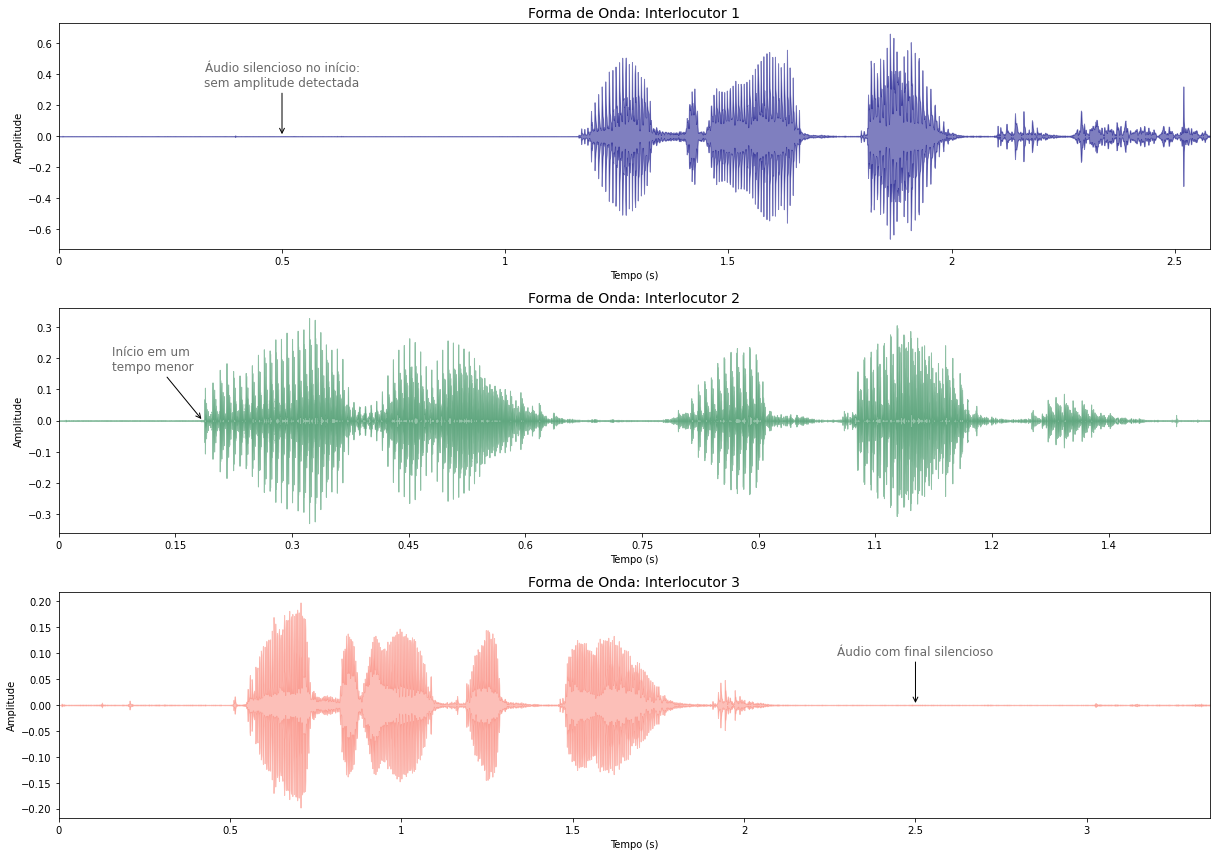

In [10]:
# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)

# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')

# Anotações
axs[0].annotate(f'Áudio silencioso no início:\nsem amplitude detectada', (0.5, 0.0), xytext=(0,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')
axs[1].annotate(f'Início em um \ntempo menor', (0.185, 0.0), xytext=(-50,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')
axs[2].annotate(f'Áudio com final silencioso', (2.5, 0.0), xytext=(0,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')   

plt.tight_layout()

Os gráficos acima, evidenciando as formas de onda no domínio do tempo, são de grande importância para o entendimento dos sinais sonoros. A partir deles, é possível analisar graficamente o que foi mostrado anteriormente pelo widget do módulo `IPython.display`.

Em uma visão geral, é possível analisar, por exemplo, que o primeiro interlocutor gravou um sinal silencioso no início. Já o segundo interlocutor iniciou rapidamente a fala, gerando um sinal de duração mais baixa. O terceiro interlocutor demorou a finalizar a gravação, gerando assim um áudio de final silencioso. Além disso, é possível analisar as características de onda presentes em cada um dos três sinais.

Para propor uma análise ainda mais rica, a figura abaixo normaliza os eixos e traz todas três formas de onda em um único local.

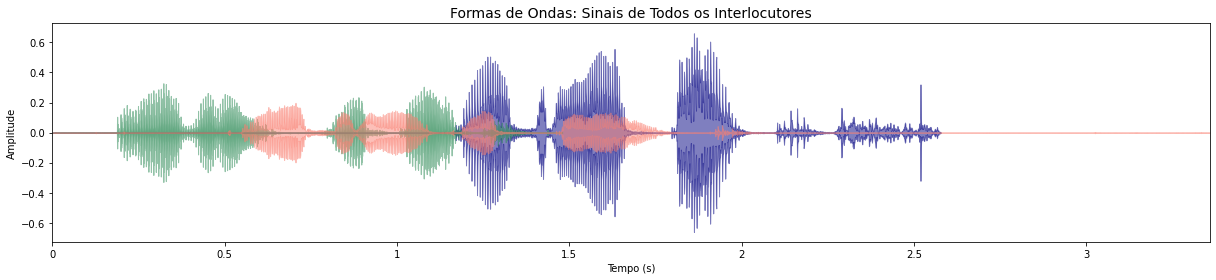

In [11]:
# Plotando todos os sinais em um mesmo eixo
fig, ax = plt.subplots(figsize=(17, 4))
ld.waveplot(y1, sr=SAMPLE_RATE, ax=ax, color=COLORS[0], alpha=.5)
ld.waveplot(y2, sr=SAMPLE_RATE, ax=ax, color=COLORS[1], alpha=.5)
ld.waveplot(y3, sr=SAMPLE_RATE, ax=ax, color=COLORS[2], alpha=.5)

ax.set_title(f'Formas de Ondas: Sinais de Todos os Interlocutores', size=14)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
plt.tight_layout()

Apesar de observar detalhes antes impercetíveis, ainda sim existem poucos elementos capazes de descrever os sinais de forma relevante. Nas próximas sessões, será proposto uma visão geral sobre as principais features a serem extráidas dos sinais e, na sequência, a extração propriamente dita.

# Feature Extraction

Após uma eficiente jornada na leitura, entendimento e análise inicial em sinais de áudio, é preciso dar um passo adicional no detalhamento destes sinais de modo a propor construções mais arrojadas visando a identificação de interlocutores. Nesta etapa do projeto, serão colocados em pauta tópicos relacionados a _extração de features_ dos sinais, sendo estas responsáveis por caracterizar e definir elementos importantes sobre os mesmos.

Como passo inicial, é preciso ter uma visão geral sobre algumas das principais _features_ a serem extraídas de um sinal sonoro. Basicamente, em aplicações relacionadas a áudio, é feita uma categorização das features em termos de domínio, gerando assim três grandes grupos:

* **_Domínio do Tempo_**: características do sinal extraídas no domínio do tempo
    * Envelope de amplitude;
    * Energia média quadrática;
    * Zero crossing rate.
    
    
* **_Domínio da Frequência_**: características do sinal extraídas no domínio da frequência
    * Energia de banda;
    * Centroid espectral;
    * Fluxo espectral.
    
    
* **_Domínio de Tempo-Frequência_**: características extraídas dos domínios do tempo e frequência em conjunto
    * Espectrogramas;
    * Mel-espectrogramas;
    * Constant-Q transform.
    
Nessa sessão, serão propostas análises mais detalhadas sobre as features presentes em cada um dos domínios acima citados, facilitando assim o entendimento das aplicações e de suas formas de extração, sendo estas compostas por ferramentas prontas (`librosa`) ou implementações próprias.

## Domínio do Tempo

As features relacionadas ao domínio do tempo, como mencionado anteriormente, são extraídas a partir de características do sinal em seu comportamento temporal. Junto com as features presentes no domínio da frequência, formam um conjunto de características classificadas como _baixo nível de abstração_, ou seja, possuem apenas uma interpretabilidade computacional, não podendo ser relacionada a eventos humanamente interpretáveis ou perceptíveis.

Em outras palavras, calcular essas features significa trazer características importantes dos sinais interpretáveis apenas por algoritmos. Visualmente e analiticamente, é possível considerar os parâmetros extraídos para diferenciar sinais porém, em termos práticos, features de baixo nível de abstração normalmente são plugadas em inteligências que aprendem funcionalidades intrínsecas.

### Envelope de Amplitude

O evenlope de amplitude é um conceito responsável por retornar a amplitude máxima de todas as amostras presentes em um frame. Seu cálculo é dado por:

$$AE_t = \max^{(t+1).K-1}_{k=t.K}s(k)$$

Onde $s(k)$ é o sinal em função da amostra $k$ e os límites da função `max` representam a primeira e a última amostra do frame $t$. Dessa forma, o cálculo representa a amplitude máxima considerando as amostras presentes em um frame. Na prática, como um sinal é composto por diversos frames, o resultado dessa aplicação deve ser um array de $T$ elementos (onde $T$, neste caso, é a quantidade total de frames), cada qual contendo a amplitude máxima registrada por frame.

Entre as principais carcaterísticas práticas do envelope de amplitude, é possível citar:

* _Ideia bruta de altura do som_
* _Sensível a outliers_
* _Aplicada em onset detection (início de notas) ou classificação de gênero musical_

Como não há nenhuma função ou método nativo na biblioteca `librosa` para o cálculo do envelope de amplitude, a função definida abaixo é responsável por retornar um array contendo as amplitudes máximas por frame:

In [12]:
# Definindo função para calcular o envelope de amplitude
def amplitude_envelope(signal, frame_size, hop_length):
    """
    Função responsável por calcular o envelope de amplitude de um dado sinal
    
    Parâmetros
    ----------
    :param signal: sinal de áudio de entrada [type: np.array]
    :param frame_size: quantidade de amostras por frame [type: int]
    :param hop_length: deslocamento de amostras à direita para o próximo frame [type: int]
    
    Retorno
    -------
    :param ae: array com as amplitudes máximas por frame [type: np.array]
    """
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

A função acima foi calculada utilizando os conceitos de [_list comprehension_](https://pythonacademy.com.br/blog/list-comprehensions-no-python) em Python e tem como base a fatiação no array de sinal para calcular a amplitude máxima por cada faixa definida pelos parâmetros `frame_size` e `hop_length`. Dessa forma, pode-se então aplicar a função a cada um dos três sinais utilizados na exploração para visualizar como o envelope de amplitude se relaciona ao sinal original.

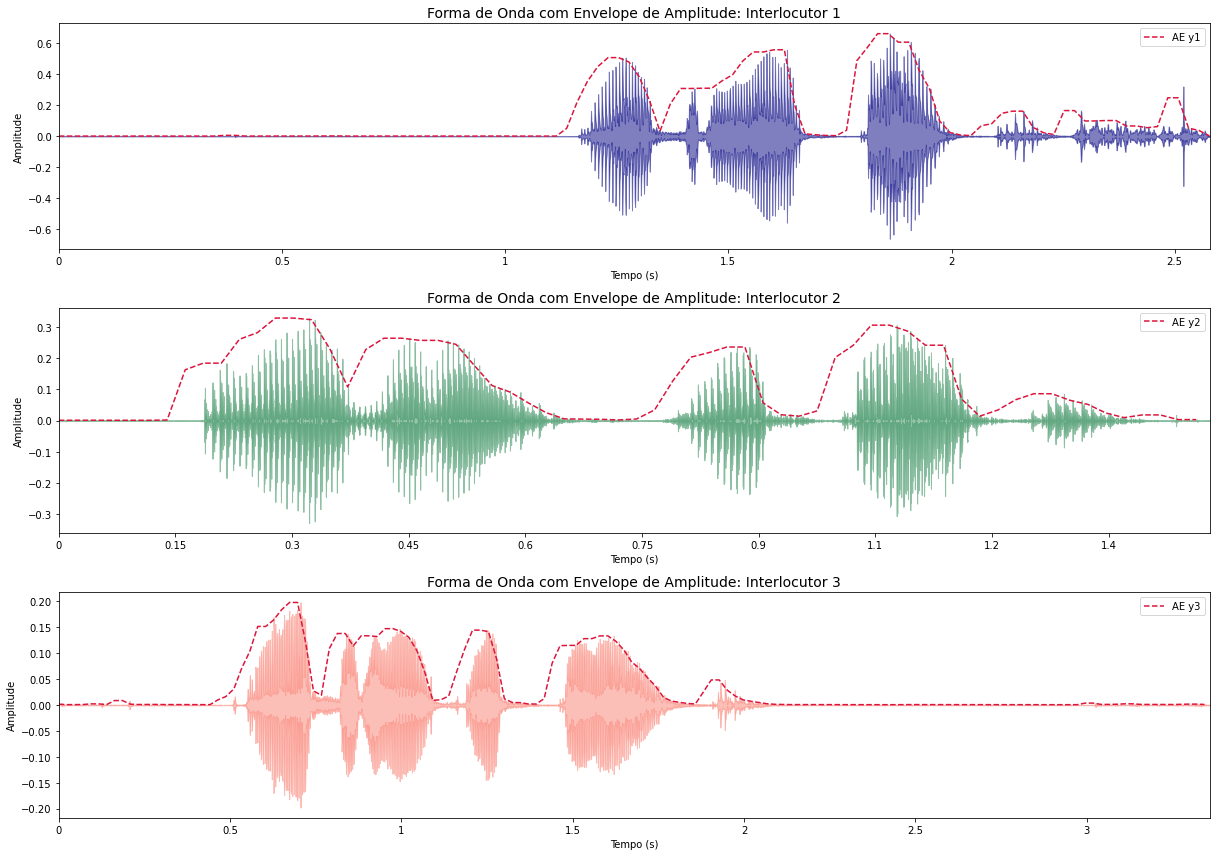

In [13]:
# Calculando AE para os sinais de áudio
ae_y1 = amplitude_envelope(signal=y1, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
ae_y2 = amplitude_envelope(signal=y2, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
ae_y3 = amplitude_envelope(signal=y3, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)

# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas e envelope de amplitude
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
axs[0].plot(t1, ae_y1, color='crimson', linestyle='--', label='AE y1')

ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
axs[1].plot(t2, ae_y2, color='crimson', linestyle='--', label='AE y2')

ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)
t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
axs[2].plot(t3, ae_y3, color='crimson', linestyle='--', label='AE y3')


# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda com Envelope de Amplitude: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude') 
    ax.legend()

plt.tight_layout()

### Root Mean Squared Energy

A energia média quadrática de um sinal (ou RMS Energy), intuitivamente, é calculada a partir da energia média das amostras presentes em cada frame de um sinal de áudio. Neste conceito, o fator primordial a ser definido é o cálculo da energia do sinal, sendo este dado pela amplitude ao quadrado:

$$E_k = s(k)²$$

Dessa forma, é possível definir a energia média quadrática de um sinal por:

$$RMS_t = \sqrt{\frac{1}{K}\sum^{(t+1)K-1}_{k=t.K}s(k)²}$$

Onde é possível observar os mesmos elementos de índice do cálculo do envelope de amplitude, evidenciando assim que a energia média quadrática também é uma função aplicada as amostras de áudio presentes em um frame $t$, resultando assim em um array com número de elementos proporcional ao tamanho do frame (`frame_size`) e a variável de deslocamento (`hop_length`) definidos previamente.

Entre as características práticas do cálcuo da energia quadrática média, é possível citar:

* _Indicador de altura do som_
* _Menos sensível a outliers em relação ao envelope de amplitude_
* _Pode ser utilizada na segmentação de áudios (eventos/interlocutores) e classificação de gênero musical_

Felizmente, a biblioteca `librosa` possui a função nativa `librosa.feature.rms` capaz de calcular a energia média quadrática. No bloco a seguir, essa função será aplicada e seu resultado visualizado juntamente com os sinais de áudio utilizados na exploração.

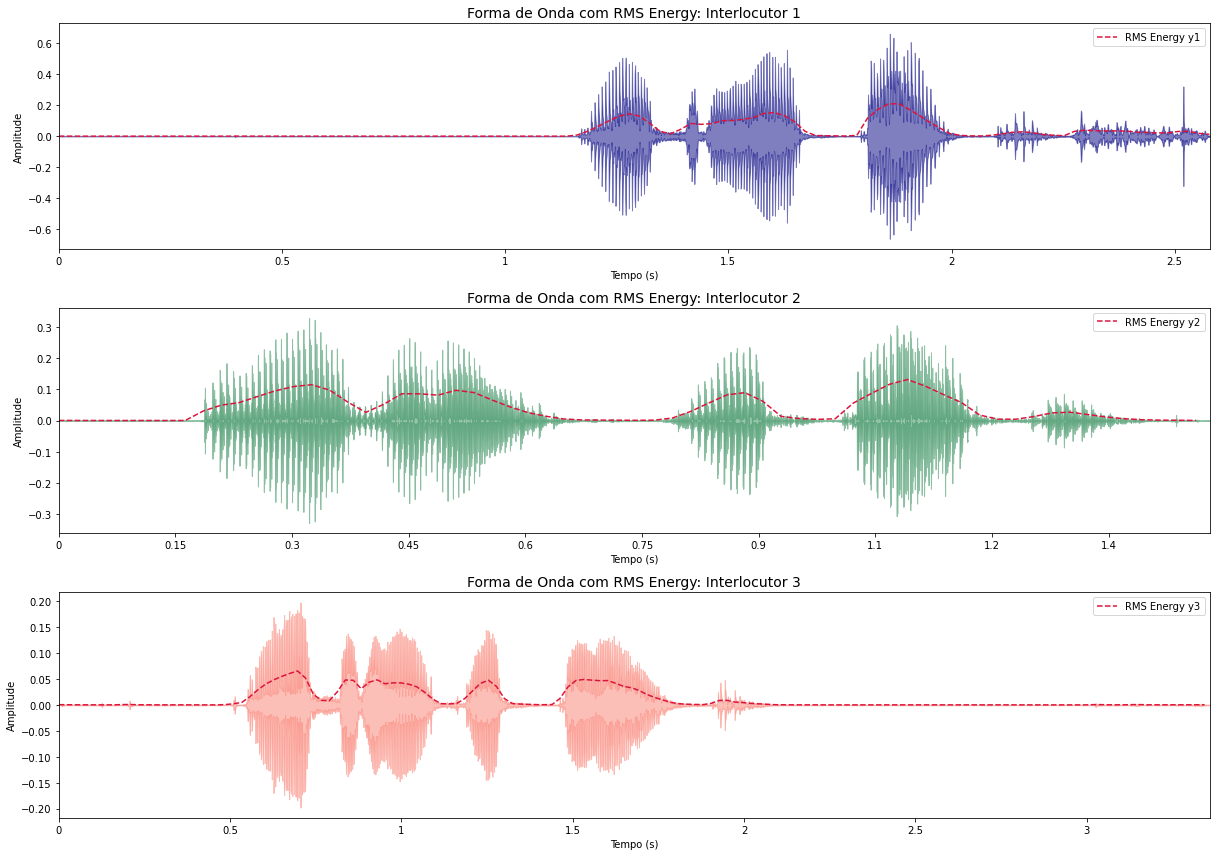

In [14]:
# Retornando rms para cada sinal
rms_y1 = librosa.feature.rms(y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_y2 = librosa.feature.rms(y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_y3 = librosa.feature.rms(y3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas e envelope de amplitude
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
axs[0].plot(t1, rms_y1, color='crimson', linestyle='--', label='RMS Energy y1')

ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
axs[1].plot(t2, rms_y2, color='crimson', linestyle='--', label='RMS Energy y2')

ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)
t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
axs[2].plot(t3, rms_y3, color='crimson', linestyle='--', label='RMS Energy y3')


# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda com RMS Energy: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude') 
    ax.legend()

plt.tight_layout()

### Zero Crossing Rate

A feature Zero Crossing Rate (ou ZCR) também possui uma explicação intuitiva ligada ao próprio nome: trata-se de um parâmetro calculado através da quantidade de vezes que o sinal "cruza" o eixo horizontal (zero). Com ele, é possível ter uma ideia de oscilação e definição de sons percursivos ou ruídos. Matematicamente, seu cálculo se dá por:

$$ZCR_t = \frac{1}{2} \sum^{(t+1)K-1}_{k-tK} |sgn(s(k)) - sgn(s(k+1))|$$

Onde a função $sgn(s(k))$ refere-se ao sinal da amostra $k$ dentro do frame $t$. Os termos $sgn(s(k)) - sgn(s(k+1))$ indicam uma comparação entre o sinal da amostra $k$ e o sinal da amostra $k+1$ subsequente, trazendo assim a ideia de verificação se o sinal realmente "cruzou" o eixo zero horizontal.

Entre as características da feature ZCR, pode-se citar:

* _Reconhecimento de sons percursivos ou com pitch_
* _Estimativa de pitch monofônicos_
* _Decisões de voz/silêncio para sinais de voz falados_

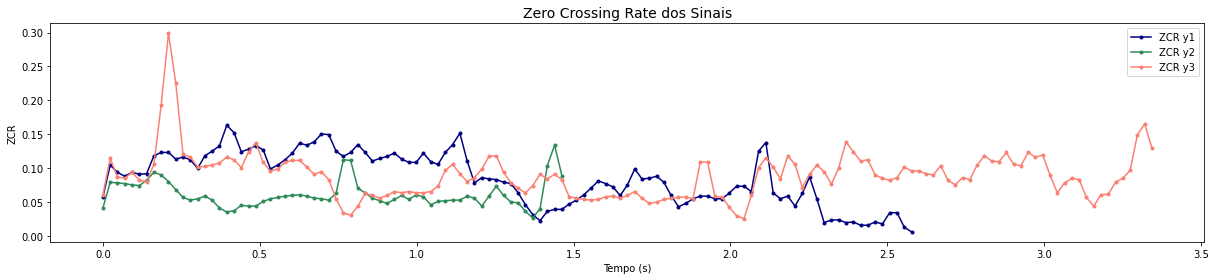

In [15]:
# Retornando zcr para cada sinal
zcr_y1 = librosa.feature.zero_crossing_rate(y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y2 = librosa.feature.zero_crossing_rate(y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y3 = librosa.feature.zero_crossing_rate(y3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Criando figura de plotagem
fig, ax = plt.subplots(figsize=(17, 4))

# Plotando ondas e envelope de amplitude
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
ax.plot(t1, zcr_y1, color=COLORS[0], marker='o', markersize=3, linestyle='-', label='ZCR y1')

t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
ax.plot(t2, zcr_y2, color=COLORS[1], marker='o', markersize=3,  linestyle='-', label='ZCR y2')

t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
ax.plot(t3, zcr_y3, color=COLORS[2], marker='o', markersize=3, linestyle='-', label='ZCR y3')


# Customizando plotagem
ax.set_title(f'Zero Crossing Rate dos Sinais', size=14)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('ZCR')
ax.legend()

plt.tight_layout()

## Domínio da Frequência

Após uma análise detalhada em algumas das principais features extraídas através do domínio do tempo, nesta sessão serão explorados tópicos relacionados ao domínio da frequência. Em termos práticos, os sinais de áudio lidos em sua forma mais bruta encontram-se, por padrão, no domínio do tempo. De forma intuitiva, a leitura destes sinais retornam amplitudes ao longo de uma série temporal o que, basicamente, são os insumos essenciais para os cálculos das features acima realizados.

Nesta sessão, é preciso realizar uma transformação na abordagem temporal que permita uma análise mais detalhada a ser realizada no domínio da frequência, ou seja, o grande interesse, neste cenário, está relacionado a decomposição de um sinal de áudio bruto lido no espectro de frequências que o compõem. Para isso, utiliza-se um conceito fundamental em análises de sinais: a **transformada de Fourier**.

### Transformada de Fourier

Antes de analisar as extrações das features no domínio da frequência propriamente ditas, é essencial abordar um conceito fundamental tido como alicerce nesse cenário. Conforme mencionado anteriormente, a transformada de Fourier funciona como uma espécie de algoritmo capaz de decompor um sinal de entrada em um espectro de frequências. Ao aplicar a transformada de Fourier, é possível identificar as frequências que compõe um dado sinal variante no tempo e, além disso, analisar suas respectivas magnitudes, permitindo assim conclusões mais detalhadas sobre as características do sinal de entrada.

Para sinais contínuos, a transformada de Fourier pode ser calculada por:

$$\hat{f}(f) = \mathcal{F}\{g(t)\} = \int_{-\infty}^{+\infty} g(t).e^{-i 2\pi ft}dt$$

Entretanto, nas mais diversas aplicações computacionais, os sinais contínuos são convertidos para sinais discretos através de técnicas de conversão analógica-digital (ADC). A _amostragem_ e a _quantização_ são exemplos de técnicas utilizadas para essa finalidade. Assim, a transformada discreta de Fourier (ou DFT de _Discrete Fourier Transform_) se faz presente como uma forma de calcular a transformada de Fourier em sinais digitais discretos:

$$\hat{x}(f)=\sum_{n=0}^{N-1} x(n).e^{-i 2\pi fn}$$

ou então considerando elementos de amostragem:

$$\hat{x}(k/N)=\sum_{n=0}^{N-1} x(n).e^{-i 2\pi n\frac{k}{N}}$$

com $k$ variando no mesmo intervalo que a quantidade $N$ de elementos, ou seja, em um limite de divisões igual ao número total de amostras do sinal de entrada que, por sua vez, é limitado pelo _sampling rate_ $s_r$.

<div class="alert alert-block alert-info">
<b>Frequência de Nyquist:</b> A transformada de Fourier de tempo discreto, puramente definida anteriormente, proporciona uma espécie de <i>redundância</i> no espectro de frequências gerado. Utilizando o <i>sampling rate</i> como limite superior, é possível visualizar magnitudes espelhadas para baixas e altas frequências no espectro resultante. O fator que define o centro simétrico do espectro espelhado é dado pela frequência de Nyquist e definido por $k=N/2 \rightarrow F(N/2) = sr/2$. Sua definição formal está relacionada ao limiar superior de frequência que delimita a possibilidade de reconstrução de um sinal digital em seu formato original sem a injeção de elementos indesejados, como os efeitos de <i>aliasing</i>, por exemplo.
</div>

A linguagem python oferece uma série de bibliotecas matemáticas capazes de calcular a transformada de Fourier de tempo discreto (DFT) em sinais ou formas de onda. Bibliotecas como `numpy`, `scipy` ou a própria `librosa` possuem módulos prontos para esse cálculo e, em alguns cenários, é possível visualizar a aplicação de algoritmos ou transformadas de Fourier relativamente diferentes das transformadas clássicas acima definidas. São os casos da `fft` (_Fast Fourier Transform_) e da `stft` (_Short-time Fourier Transform_).

___
>**_Fast Fourier Transform_**: por conta da alta complexidade computacional da DFT $(N²)$, foi desenvolvido um método mais veloz para o cálculo da transformada de fourier no tempo discreto. Com uma complexidade proporcional a $N\log_2N$, a [transformada rápida de Fourier](https://pt.wikipedia.org/wiki/Transformada_r%C3%A1pida_de_Fourier) (ou FFT) explora as redundâncias através das senóides do sinal de entrada para reaproveitar cálculos. Como _trade off_, a FFT existe que o número $N$ de amostras seja definido como uma potência de 2.

___

>**_Short-Time Fourier Transform_**: em muitas aplicações de análises de áudio, a visualização do espectro de frequências apenas no domínio das frequências pode não ser suficiente para se ter conclusões mais assertivas sobre os sinais. Propondo uma análise espectral dependente do tempo, a [transformada de Fourier de termo curto](https://pt.wikipedia.org/wiki/Transformada_de_Fourier_de_curto_termo) (ou STFT) permite visualizar espectrogramas que envolvem a magnitude de cada frequência em cada espaço de tempo de duração do sinal de entrada.
___

Realizadas as breves conceituações dos tópicos relevantes para análises no domínio da frequência, será proposto abaixo a aplicação da transformada de Fourier (via FFT) nos sinais de áudio utilizados na exploração. O objetivo dessa etapa é visualizar o espectro de frequências para cada interlocutor.

In [16]:
# Definindo funções para cálculo e plotagem da fft
def calc_fft(y, sr, f_ratio=.5):
    """
    Função responsável por calcular a transformada de Fourier (fft)
    de um sinal "y" de entrada
    
    Parâmetros
    ----------
    :param y: conjunto de amplitudes em um formato de série temporal [type: np.array]
    :param sr: taxa de amostragem do sinal lido (sampling rate) [type: int]
    :param f_ratio: taxa de divisão das frequências analisadas [type: float, default=.5]
    
    Retorno
    -------
    :return yf: magnitudes dos elementos complexos resultantes da fft [type: np.array]
    :return freqs: conjunto de frequências analisadas [type: np.array]
    """
    
    # Aplicando transformada de fourier
    yf = np.abs(np.fft.fft(y))
    freqs = np.linspace(0, sr, len(yf))
    
    # Filtrando por taxa de divisão de frequências
    f_bins = int(len(yf) * f_ratio)
    return yf[:f_bins], freqs[:f_bins]

def plot_fft_spectrum(y, sr, ax, f_ratio=.5, color='darkslateblue', alpha=1):
    """
    Função responsável por calcular e plotar o espectro de frequências
    de um sinal gerado pela transformada de Fourier (fft)
    
    Parâmetros
    ----------
    :param y: conjunto de amplitudes em um formato de série temporal [type: np.array]
    :param sr: taxa de amostragem do sinal lido (sampling rate) [type: int]
    :param ax: eixo de plotagem do espectro de frequências [type: matplotib.Axes]
    :param f_ratio: taxa de divisão das frequências analisadas [type: float, default=.5]
    :param color: cor da plotagem gráfica [type: string, default='darkslateblue']
    :param alpha: transparência da plotagem gráfica [type: float, default=1]
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além da plotagem gráfica do espectro
    """
    
    # Calculando a fft do sinal de entrada
    yf, freqs = calc_fft(y=y, sr=sr, f_ratio=f_ratio)
    
    # Plotando espectro
    ax.plot(freqs, yf, color=color, alpha=alpha)
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Magnitude')

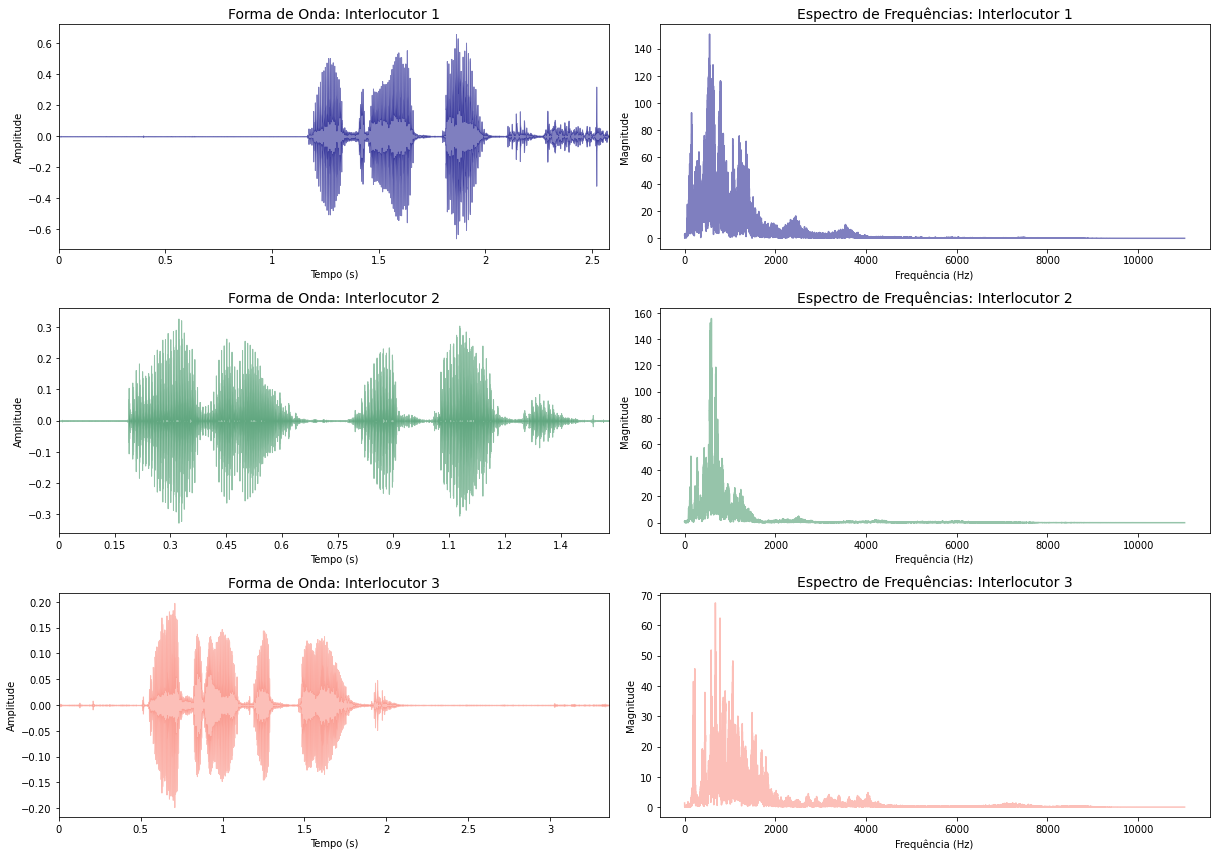

In [17]:
# Plotagem gráfica dos sinais no tempo e frequência
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 12))

# Plotando sinais de onda no domínio do tempo
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0, 0], color=COLORS[0], alpha=.5)
ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1, 0], color=COLORS[1], alpha=.5)
ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2, 0], color=COLORS[2], alpha=.5)

# Plotando espectro de frequências dos sinais
plot_fft_spectrum(y=y1, sr=SAMPLE_RATE, ax=axs[0, 1], color=COLORS[0], alpha=.5)
plot_fft_spectrum(y=y2, sr=SAMPLE_RATE, ax=axs[1, 1], color=COLORS[1], alpha=.5)
plot_fft_spectrum(y=y3, sr=SAMPLE_RATE, ax=axs[2, 1], color=COLORS[2], alpha=.5)

# Customizando plotagens
i, j = 1, 1
for ax in axs[0, 0], axs[1, 0], axs[2, 0]:
    ax.set_title(f'Forma de Onda: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')
    i += 1
    
for ax in axs[0, 1], axs[1, 1], axs[2, 1]:
    ax.set_title(f'Espectro de Frequências: Interlocutor {j}', size=14)
    j += 1

plt.tight_layout()

### Espectrogramas

Para entender e extrair os espectrogramas dos sinais de áudio, é preciso entrar em detlhes sobre a _transformada de Fourier de termo curto_ (STFT). Introduzida anteriormente como uma variação da transforma da Fourier capaz de unir os domínios do tempo e frequência (requisitos primordiais que definem o conteúdo de um espectrograma), a STFT é uma forma de analisar as magnitudes de cada componente de frequência de um sinal ao longo do tempo. Trata-se de uma ferramenta extremamente poderosa que permite análises muito mais robustas em sinais de áudio.

Enquanto a FFT tem como base a aplicação da transformada de Fourier em todo o sinal para extrair suas componentes de frequências, a lógica por trás da STFT tem como base a segmentação do sinal para aplicação de diversas funções FFT de modo a extrair componentes pontuais. Dentro deste cenário, é extremamente importante definir conceitos de _framing_, _windowing_ e _hop length_:

___
>**_Framing:_** o processo de _framing_ de um sinal de áudio pode ser definido pela coleta de _chunks_ de amostras com duração perceptível ao ouvido humano. Para a realização do processo, é necessário definir o "tamanho do frame" que, por sua vez, está relacionado a quantidade de amostras presentes em cada frame. Normalmente, levando em conta critérios de otimização de funções, escolhe-se um tamanho de frame proporcional a potência de 2 (entre 256 a 8192, dependendo da aplicação). A duração de um frame é calculada por:

$$d_f = \frac{1}{s_r}.K$$

___

> **_Windowing:_** a ideia fundamental por trás do processo de _windowing_ está atrelada a aplicação de uma função _window_ em cada um dos frames extraídos de um sinal de áudio para que, dessa forma, seja possível gerar um sinal periódico, evitando assim efeitos indesejados de vazamento de frequências (ou _spectral leakage_). O efeito de vazamento de frequência é encontrado comumente em sinais de áudio e está relacionado a sinais com períodos não inteiros, gerando descontinuidade entre os pontos iniciais e finais, resultando em componentes indesejadas de alta frequência no espectro resultante da transformada de Fourier. Em grande das aplicações de áudio, utiliza-e a [função de Hann](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_Hann) para a aplicação do processo de _windowing_. Abaixo, é possível visualizar a função Hann $w(k)$ e o sinal resultante $s_w(k)$ gerado pelo processo:

$$w(k) = 0.5 . \left(1 - \cos\left(\frac{2\pi k}{K-1}\right)\right), k=1...K$$


$$s_w(k) = s(k) . w(k)$$

___

> **_Hop Length:_** a aplicação do processo de _windowing_ pode gerar alguns fatores indesejados para os sinais de áudio contínuos no tempo. A suavização dos pontos de início e fim em cada frame gera perdas de informação irrecuperáveis por qualquer procedimento posterior. Para evitar tais perdas, é possível definir um conceito conhecido como _hop length_ e que está diretamente atrelado ao processo de sobreposição de frames em um mesmo sinal de áudio. Em sua definição formal, é possível tratar o _hop length_ como o deslocamento de amostras a direita a cada novo frame em um sinal. Dessa forma, é razoável definir este parâmetro como um número proporcional a metade ou a quarta parte da quantidade de amostras por frame permite que o processo de _windowing_ seja aplicado sem que informações sobre os sinais sejam perdidas, visto que a sobreposição garante que a informação estará sempre presente nos _endpoints_.
___

Em termos práticos, considerando os conceitos acima definidos, a grande maioria das funções já implementadas exigem os seguintes parâmetros:

* `frame size`: quantidade de amostras presentes em cada frame do sinal original;
* `window size`: quantidade de amostras as quais a função _window_ será aplicada (normalmente, window size = frame size);
* `hop length`: deslocamento de amostras à direita de um sinal a cada início de um novo frame (normalmente, frame size // 4)

Assim, introduzidos os principais conceitos relacionados ao tratamento de sinais, é possível definir a STFT como:

$$S(m, k) = \sum^{N-1}_{n=0}x(n+mH).w(n).e^{-i2\pi n\frac{k}{N}}$$

onde $m$ é o índice do frame e traz uma dependência temporal antes inexistente na DFT. Dessa forma, é possível associar a STFT como uma função que associa os domínios do tempo e frequência em um mesmo lugar. Em um resumo de definições de parâmetros, os elementos que compõe a STFT são:

* $m$: índice do frame relacionado ao sinal original
* $H$: parâmetro `hop length` (a multiplicação $mH$ representa a primeira amostra do frame $m$ atual)
* $w(n)$: função window (Hann)

Como resultado final, a STFT retorna uma matriz espectral de duas dimensões que relaciona tempo e frequência em um mesmo objeto. Na prática, essa matriz é composta por um eixo y relacionado a cada uma das frequências resultantes da transformada de Fourier (_frequency bins_) e por um eixo x representando cada um dos frames extraídos durante a análise. Cada elemento dessa matriz traz os coeficientes complexos da transformada de Fourier para cada faixa de frequência em cada frame (ou em cada espaço de tempo do sinal).

As dimensões da matriz resultante (#frequências, #frames) podem ser calculadas por:

$$\text{# frequências} = \frac{framesize}{2} + 1 \text{ } \rightarrow \text{entre 0 e }s_r/2$$ 

$$\text{# frames} = \frac{samples - framesize}{hopsize} + 1$$


<div class="alert alert-block alert-info">
<b>Trade off tempo-frequência:</b> para o cálculo da STFT em sinais, existe um _trade off_ entre tempo e frequência em relação a resolução da matriz resultante. Até este ponto, sabe-se que enquanto uma dimensão da matriz se refere as frequências da transformada de Fourier, a outra dimensão é uma proxy temporal vinculada aos frames do sinal. Quanto maior o tamanho do frame escolhido (parâmetro <code>frame size</code>), maior a resolução da frequência e menor a resolução do tempo. Em outras palavras, maior o número de elementos no eixo da frequência da matriz e menor o número de elementos no eixo temporal. Analogamente, quanto menor o valor para <code>frame size</code>, menos frequências são analisadas na transformada e mais frames são considerados no eixo temporal.
</div>

In [18]:
# Definindo funções para cálculo da stft
def plot_spectrogram(y, frame_size, hop_length, ax, y_axis='log', x_axis='time', cmap='rainbow'):
    """
    Função responsável por calcular e plotar um espectrograma usando a biblioteca librosa
    
    Parâmetros
    ----------
    :param y: conjunto de amplitudes em um formato de série temporal [type: np.array]
    :param frame_size: quantidade de amostras por frame [type: int]
    :param hop_length: deslocamento de amostras a direita para cada novo frame [type: int]
    :param ax: eixo de plotagem do espectrograma [type: matplotlib.Axes]
    :param y_axis: escala do eixo y de frequências [type: string, default='log']
    :param y_axis: escala do eixo x temporal [type: string, default='time']
    :param cmap: paleta de cores utilizada na plotagem [type: string, default='rainbow']
    
    Retorno
    -------
    Essa função não retorna nenhum objeto além da plotagem gráfica do espectrograma
    """
    
    # Calculando matriz espectral a partir da STFT
    S = np.abs(librosa.stft(y=y, n_fft=frame_size, hop_length=hop_length))
    
    # Convertendo para escala definida
    if y_axis == 'log':
        S = librosa.amplitude_to_db(S, ref=np.max)
    
    # Plotando espectrograma
    ld.specshow(data=S, ax=ax, x_axis=x_axis, y_axis=y_axis, cmap=cmap)

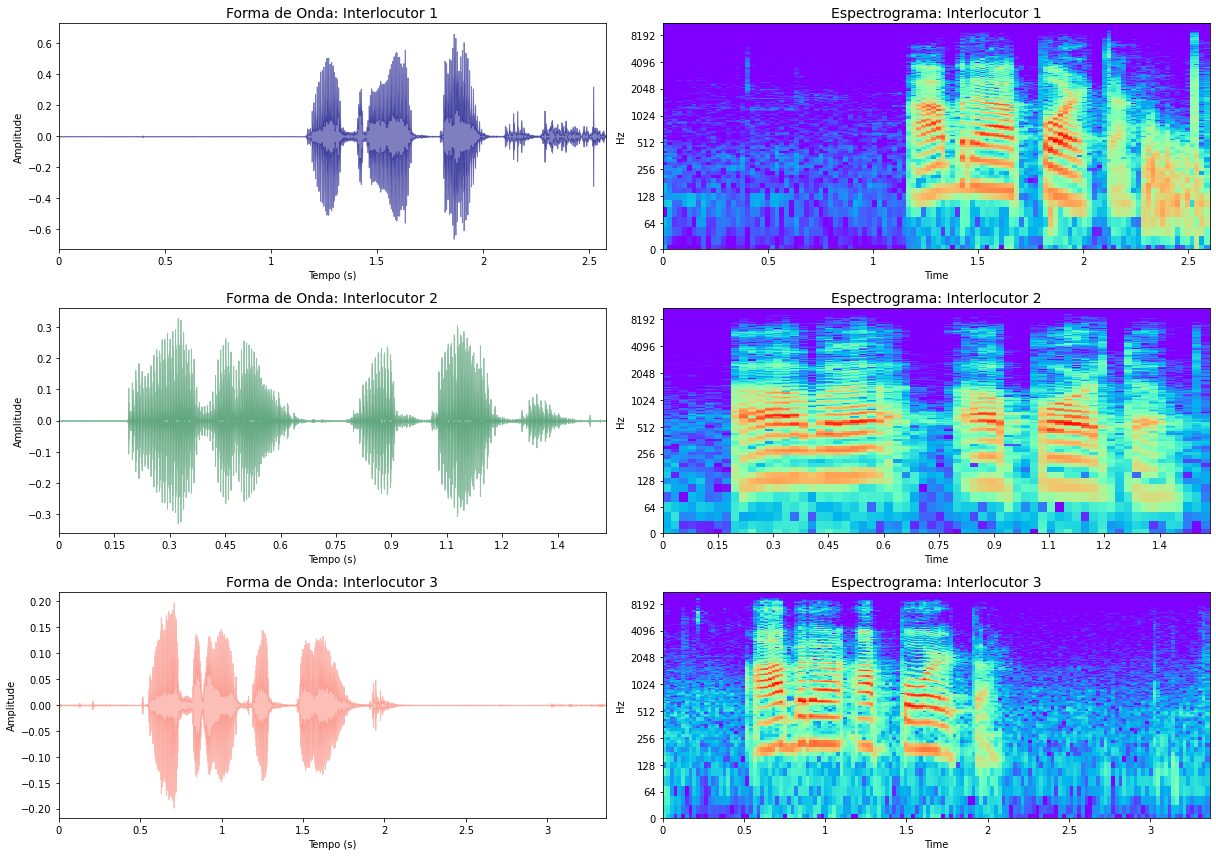

In [19]:
# Plotagem gráfica dos sinais no tempo e frequência
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 12))

# Plotando sinais de onda no domínio do tempo
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0, 0], color=COLORS[0], alpha=.5)
ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1, 0], color=COLORS[1], alpha=.5)
ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2, 0], color=COLORS[2], alpha=.5)

# Plotando espectro de frequências dos sinais
plot_spectrogram(y=y1, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[0, 1])
plot_spectrogram(y=y2, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[1, 1])
plot_spectrogram(y=y3, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[2, 1])

# Customizando plotagens
i, j = 1, 1
for ax in axs[0, 0], axs[1, 0], axs[2, 0]:
    ax.set_title(f'Forma de Onda: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')
    i += 1
    
for ax in axs[0, 1], axs[1, 1], axs[2, 1]:
    ax.set_title(f'Espectrograma: Interlocutor {j}', size=14)
    j += 1

plt.tight_layout()

### Mel Espectrogramas

Após analisar em detalhes os espectrogramas gerados para os sinais utilizados na exploração, bem como o funcionamento da STFT como uma forma de calcular indicadores que relacionam os domínios do tempo e frequência, é chegado o momento de analisar a escala Mel e os coeficientes MFCCs.

Um detalhe interessante sobre a escala Mel de frequências diz respeito sobre a percepção humana: o ouvido humana possui percepções sobre frequências em escala logaritma. Nos espectrogramas acima plotados a partir da STFT, as frequência possuem escala linear, provendo assim uma leve dificuldade de interpretação em termos de percepção humana. Analisando o cenário ideal de uma possível feature para ser utilizada como descrição de sinais de áudio, os seguintes fatores poderiam ser considerados fundamentais:

* _Feature capaz de proporcionar uma representação nos domínios do tempo e frequência_
* _Feature capaz de representar amplitudes de acordo com a percepção humana_
* **_Feature capaz de representar frequências de acordo com a percepção humana_** (escala Mel)

Para os dois primeiros itens, já foram abordadas features capazes de cumprir com tais objetivos. Os espectrogramas clássicos são bons exemplos disso. Entretanto, para o terceiro tópico, até o momento não foi introduzida nenhuma feature capaz de tratar a escala de frequências em um formato perceptível ao ouvido humano. Nesse ponto, tem-se os **Mel espectrogramas** calculados utilizando elementos de frequência na escala Mel.

___

<div class="alert alert-block alert-info">
<b>Escala Mel:</b> a <a href=https://www.google.com/search?channel=fs&client=ubuntu&q=Mel+scale>escala Mel</a> é uma escala logaritma cujo objetivo é mapear valores de frequência a uma escala adequada a percepção humana onde distâncias numéricas iguais representam distâncias igualmente perceptíveis. Uma forma popular de converter Hertz em Mels pode ser dada por:

$$m = 2595\log_{10}\left(1 + \frac{f}{700}\right)$$

O cálculo inverso para se obter frequências em Hertz a partir de frequências em Mels é definido por:

$$f = 700\left(10^{m/2595}-1\right)$$
</div>

____

Uma vez conhecida a escala Mel como uma forma de proporcionar interpretabilidade prática em frequências similiar a percepção humana, os espectrogramas Mel podem ser calculados através dos seguintes passos:

1. Extração da transformada de Fourier de termo curto (STFT);
2. Conversão das amplitudes resultantes em escala dB;
3. Conversão das frequências resultantes em escala Mel.

Os tópicos 1 e 2 já são contemplados no cálculo da matriz espectral dos espectrogramas gerados na sessão anterior. O fator inédito para retornar espectrogramas na escala Mel é dado pelo terceiro tópico relacionado a conversão das frequências para essa escala o que, de fato, exige uma série de etapas adicionais as quais serão detalhadas logo a seguir:

___
>**_Seleção de quantidade de bandas na escala Mel_**: o primeiro requisito para realizar as etapas de transformação das frequências em escala Mel é selecionar o número de bandas a serem consideradas durante a conversão. Basicamente, a quantidade de bandas selecionadas fazem parte do eixo y de frequências resultantes da transformação em escala Mel. Em termos práticos, não existe um número oficial e definitivo para a quantidade de bandas. Em muitos casos, este número pode ser considerado como um parâmetro a ser otimizado por possíveis modelos ou análises posteriores. Algumas aplicações costumam utilizar 40, 60, 90 ou 128 bandas para a escala Mel.
___

>**_Construção dos bancos de filtros na escala Mel_**: após a definição da quantidade de bandas a serem utilizadas na conversão para a escala Mel, é preciso iniciar os procedimentos para a construção do banco de filtros para a devida conversão de escala. Para isso, é necessário seguir algumas etapas:
>* Conversão das frequências mínima e máxima (limites inferior e superior) para a escala Mel;
>* Criar faixas igualmente espaçadas de acordo com a quantidade de bandas selecionadas;
>* Converter os pontos novamente para escala Hertz;
>* Arredondar para a faixa de frequência mais próxima;
>* Criar os filtros triangulares.
___

Após a construção dos bancos de filtros, existem insumos suficientes para gerar uma matriz espectral a ser analisada com frequências na escala Mel. Para ilustrar melhor os passos finais que descrevem essa conversão, é preciso entender retomar detalhes sobre as dimensões geradas por espectrogramas clássicos e as dimensões do banco de filtros na escala Mel.

Após realizar os passos para a criação do banco de filtros, tem-se uma matriz $M$ de dimensões $(\text{#bandas}, \text{framesize}/2 +1)$. Já a matriz $S$ relacionada aos espectrogramas clássicos calculados anteriormente possui dimensões $(\text{framesize}/2+1, \text{#frames})$. Observando essas duas dimensões, percebe-se a possibilidade em realizar uma multiplicação matricial, visto que a quantidade de colunas da matriz $M$ é igual a quantidade de linhas da matriz $S$. Dessa forma, o espectrograma Mel pode ser calculado a partir da relação:

$$\text{Mel Espectrograma} = M \times S$$

As dimensões da matriz resultante de input para o espectrograma Mel é dada por $(\text{#bandas}, \text{#frames})$. Ao final do processo, tem-se uma feature capaz de propor uma visão conjunto entre os domínios do tempo e frequência com um adicional relacionado a interpretabilidade e percepção humana de frequências em uma escala adequada. Entre as principais aplicações do espectrograma Mel, é possível citar:

* Classificação de áudios;
* Reconhecimento automático de humor;
* Classificação de gênero musical;
* Classificação de instrumento musical.

In [30]:
# Definindo funções para cálculo da stft
def plot_mel_spectrogram(y, frame_size, hop_length, n_mels, ax, y_axis='mel', x_axis='time', cmap='rainbow'):
    """
    Função responsável por calcular e plotar um espectrograma na escala Mel
    
    Parâmetros
    ----------
    :param y: conjunto de amplitudes em um formato de série temporal [type: np.array]
    :param frame_size: quantidade de amostras por frame [type: int]
    :param hop_length: deslocamento de amostras a direita para cada novo frame [type: int]
    :param n_mels: quantidade de bandas na escala mel [type: int]
    :param ax: eixo de plotagem do espectrograma [type: matplotlib.Axes]
    :param y_axis: escala do eixo y de frequências [type: string, default='mel']
    :param y_axis: escala do eixo x temporal [type: string, default='time']
    :param cmap: paleta de cores utilizada na plotagem [type: string, default='rainbow']
    
    Retorno
    -------
    Essa função não retorna nenhum objeto além da plotagem gráfica do espectrograma
    """
    
    # Calculando matriz espectral na escala Mel e convertendo para dB
    M = librosa.feature.melspectrogram(y=y, n_fft=frame_size, hop_length=hop_length, n_mels=n_mels)
    M_db = librosa.amplitude_to_db(M)

    # Plotando espectrograma
    ld.specshow(data=M_db, ax=ax, x_axis=x_axis, y_axis=y_axis, cmap=cmap)

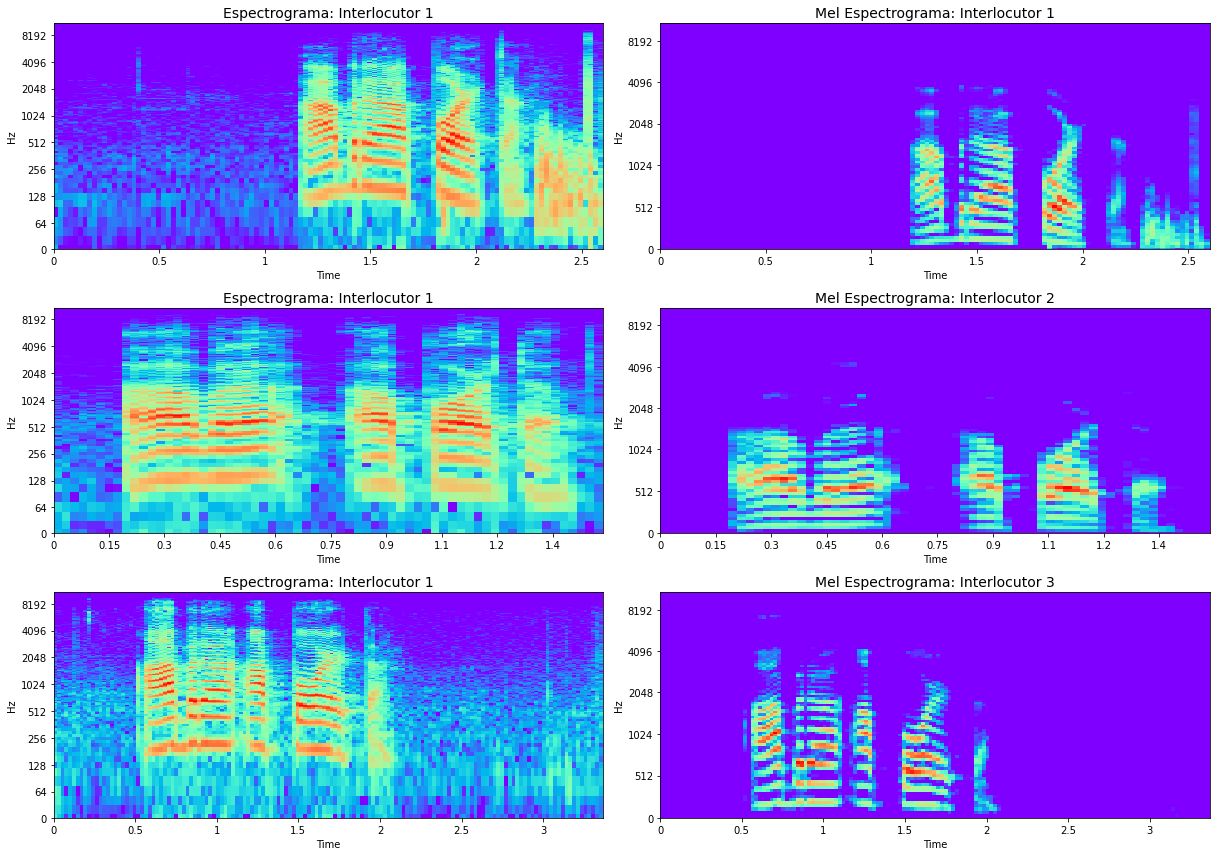

In [31]:
# Plotagem gráfica dos espectrogramas clássico e Mel
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 12))

# Plotando espectro de frequências dos sinais
plot_spectrogram(y=y1, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[0, 0])
plot_spectrogram(y=y2, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[1, 0])
plot_spectrogram(y=y3, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, ax=axs[2, 0])

# Plotando espectro de frequências dos sinais
plot_mel_spectrogram(y=y1, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, n_mels=N_MELS, ax=axs[0, 1])
plot_mel_spectrogram(y=y2, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, n_mels=N_MELS, ax=axs[1, 1])
plot_mel_spectrogram(y=y3, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, n_mels=N_MELS, ax=axs[2, 1])

# Customizando plotagens
i, j = 1, 1
for ax in axs[0, 0], axs[1, 0], axs[2, 0]:
    ax.set_title(f'Espectrograma: Interlocutor {j}', size=14)
    i += 1
    
for ax in axs[0, 1], axs[1, 1], axs[2, 1]:
    ax.set_title(f'Mel Espectrograma: Interlocutor {j}', size=14)
    j += 1

plt.tight_layout()